In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\Academics\\3rd Year\\Sem 6\\ds\\dpu\\boston.csv");
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
ndf=df.dropna(axis=0,how="any")
ndf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: xlabel='RM', ylabel='MEDV'>

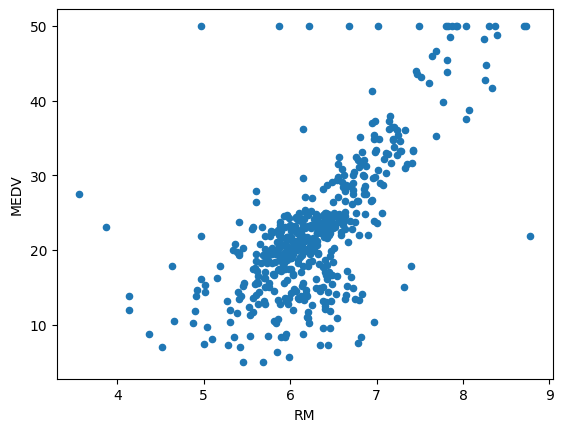

In [5]:
ndf.plot.scatter('RM','MEDV')

In [6]:
X=ndf[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=ndf['MEDV']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

Text(0, 0.5, 'predict')

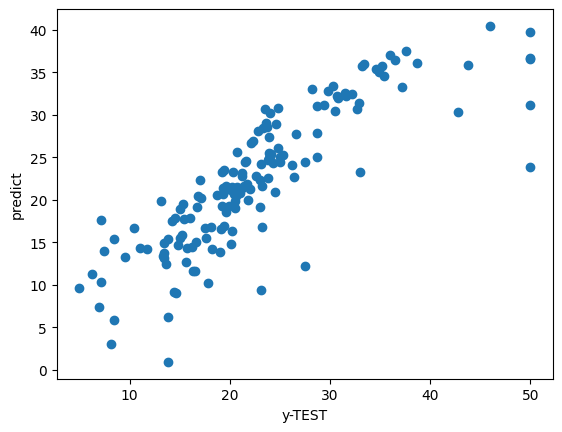

In [9]:
plt.scatter(y_test,pred)
plt.xlabel('y-TEST')
plt.ylabel('predict')

In [10]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,pred)))
df1=pd.DataFrame({'Actual ':y_test,'predict':pred,'variance':y_test-pred})
df1

MAE :  3.4140166066454904
MSE : 26.031668617593738
RMSE : 5.102123932010446


,Actual,predict,variance
401,7.2,17.641147,-10.441147
152,15.3,19.541696,-4.241696
468,19.1,16.588148,2.511852
147,14.6,8.969050,5.630950
20,13.6,12.406199,1.193801
...,...,...,...
320,23.8,24.692718,-0.892718
471,19.6,21.631748,-2.031748
244,17.6,15.443790,2.156210
200,32.9,31.425625,1.474375


In [11]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,pred)*100,2)
print('r2 score',score)

r2 score 69.77
